# DSC320: Data Summarization and Probabilities

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

In [5]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Summarizing Data:

In [2]:
# Loading qb_stats dataset and displaying results:

qb_stats_dataset = pd.read_csv('qb_stats.csv')
qb_stats_dataset.head().T

,0,1,2,3,4
name,Ryan Tannehill,Drew Brees,Lamar Jackson,Kirk Cousins,Russell Wilson
team,TEN,NO,BAL,MIN,SEA
games,12.0,11.0,15.0,15.0,16.0
att,286.0,378.0,401.0,444.0,516.0
cmp,201.0,281.0,265.0,307.0,341.0
comp_pct,70.3,74.3,66.1,69.1,66.1
yds,2742.0,2979.0,3127.0,3603.0,4110.0
ypa,9.6,7.9,7.8,8.1,8.0
td,22.0,27.0,36.0,26.0,31.0
int,6.0,4.0,6.0,6.0,5.0


### (a) Find the mean of each numerical column of data
### (b) Find the standard deviation of each numerical column of data

In [4]:
# Displaying summary for numerical features:
    
qb_numerical_summary = qb_stats_dataset.describe()
qb_numerical_summary

,games,att,cmp,comp_pct,yds,ypa,td,int,sack,loss,rating
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,14.125000,478.406250,306.562500,64.296875,3515.062500,7.375000,22.375000,10.343750,32.312500,217.093750,93.387500
std,2.406309,110.360366,68.929575,3.627537,852.437489,0.796768,6.256609,5.839849,10.514008,70.786075,11.054725
min,8.000000,247.000000,160.000000,58.800000,1707.000000,6.100000,6.000000,4.000000,12.000000,89.000000,78.300000
25%,13.000000,443.250000,272.750000,61.900000,3026.250000,6.775000,19.000000,6.000000,25.250000,167.250000,85.250000
50%,15.000000,492.000000,315.500000,64.100000,3566.000000,7.100000,22.000000,9.000000,33.500000,212.000000,89.850000
75%,16.000000,548.750000,355.000000,66.100000,4042.750000,7.925000,26.000000,13.000000,38.500000,263.250000,101.100000
max,16.000000,626.000000,408.000000,74.300000,5109.000000,9.600000,36.000000,30.000000,48.000000,397.000000,117.500000


### (c) Create a histogram of the number of yards; label it appropriately

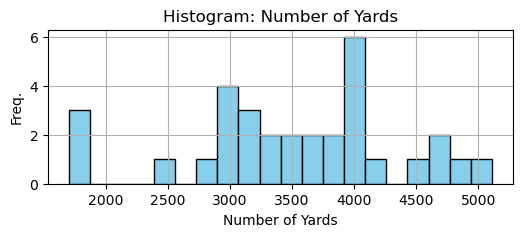

In [6]:
# Histogram:

plt.figure(figsize=(6, 2))
plt.hist(qb_stats_dataset['yds'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram: Number of Yards')
plt.xlabel('Number of Yards')
plt.ylabel('Freq.')
plt.grid(True)
plt.show()

### (d) Create a boxplot of the number of touchdowns. Identify any outliers

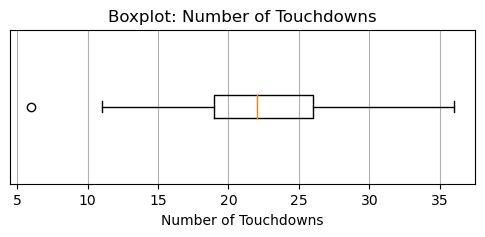

In [9]:
# Boxplot: 

plt.figure(figsize=(6, 2))
plt.boxplot(qb_stats_dataset['td'], vert=False)
plt.title('Boxplot: Number of Touchdowns')
plt.xlabel('Number of Touchdowns')
plt.yticks([])
plt.grid(True)
plt.show()

In [11]:
# Identify outliers:

# Logic: Values below Q1 - 1.5 * IQR  OR  above Q3 + 1.5 * IQR are considered outliers.

touchdowns = qb_stats_dataset['td']
outliers = touchdowns[(touchdowns < touchdowns.quantile(0.25)) | (touchdowns > touchdowns.quantile(0.75))]
if not outliers.empty:
    print("Identified outliers:")
    print(outliers)

Identified outliers:
1     27.0
2     36.0
4     31.0
7     27.0
9     30.0
12    27.0
14    11.0
18    18.0
24     6.0
26    33.0
27    17.0
28    13.0
29    17.0
31    16.0
Name: td, dtype: float64


## Calculating Probabilities from Data:

In [12]:
# Loading survey_data dataset and displaying results:

survey_data_dataset = pd.read_csv('survey_data.csv')
survey_data_dataset.head().T

,0,1,2,3,4
hair_color,brown,brown,brown,brown,brown
eye_color,brown,brown,blue,green,brown


### (a) Based off of this data, what is the probability a college student has brown hair?

In [15]:
# Counting the total students via 'len()'
total_students = len(survey_data_dataset)

# Counting the total students with brown hair
brown_hair_students = survey_data_dataset[survey_data_dataset['hair_color'] == 'brown']
total_brown_hair_students = len(brown_hair_students)

# Calculating the probability of students with brown hair
probability_brown_hair_students = total_brown_hair_students / total_students

# Printing results:
probability_brown_hair_students

0.5123456790123457

### (b) Based off of this data, what is the probability a college student has blue eyes? 

In [16]:
# Counting the total students with blue eyes
blue_eye_students = survey_data_dataset[survey_data_dataset['eye_color'] == 'blue']
total_blue_eye_students = len(blue_eye_students)

# Calculating the probability of students having blue eyes
probability_blue_eye_students = total_blue_eye_students / total_students

# Printing results:
probability_blue_eye_students

0.24691358024691357

### (c) Based off of this data, what is the probability a college student has blue eyes given that they have brown hair? 

In [17]:
"""
Code Description:
    - Interpreting this question as finding the proportion of students with blue eyes among those who already have brown hair

Code Breakdown:
    - Identify the students who have both brown hair and blue eyes 
    - Divide the number of students with both brown hair and blue eyes by the total number of students with brown hair
"""

# Counting the total students with brown hair and blue eyes
brown_hair_blue_eye_students = survey_data_dataset[(survey_data_dataset['hair_color'] == 'brown') & (survey_data_dataset['eye_color'] == 'blue')]
total_brown_hair_blue_eye_students = len(brown_hair_blue_eye_students)

# Calculating the probability of students having blue eyes given that they have brown hair
probability_blue_eyes_given_brown_hair_students = total_brown_hair_blue_eye_students / total_brown_hair_students

# Printing results:
probability_blue_eyes_given_brown_hair_students

0.21686746987951808

### (d) Based off of this data, what is the probability a college student has brown hair given that they have blue eyes?

In [18]:
"""
Code Description:
    - Interpreting this question as finding the proportion of students with brown hair among those who already have blue eyes

Code Breakdown:
    - Identify the students who have both brown hair and blue eyes 
    - Divide the number of students with both brown hair and blue eyes by the total number of students with blue eyes
"""

# Calculating the probability of students having brown hair given that they have blue eyes
probability_brown_hair_given_blue_eyes_students = total_brown_hair_blue_eye_students / total_blue_eye_students

# Printing results:
probability_brown_hair_given_blue_eyes_students

0.45

### (e) Do your results above indicate that college students having brown hair and blue eyes are independent of one another? Explain. 

The conditional probabilities computed are:
- Probability of blue eyes given brown hair is 0.2169
- Probability of blue eyes given brown hair is 0.45

If these events were independent, then both probabilities would have been equal. Since they are different, we can label them as not independent of one another. 

### (f) Create a bar graph of the hair color and eye color of this group of students. Label the graphs appropriately.

In [22]:
# Counting values of each hair color
hair_color_counts = survey_data_dataset['hair_color'].value_counts()

# Counting values of each eye color
eye_color_counts = survey_data_dataset['eye_color'].value_counts()

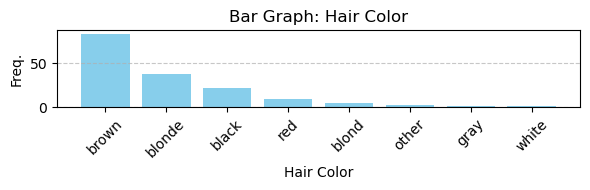

In [23]:
# Hair color bar graph:

plt.figure(figsize=(6, 2))
plt.bar(hair_color_counts.index, hair_color_counts.values, color='skyblue')
plt.title('Bar Graph: Hair Color')
plt.xlabel('Hair Color')
plt.ylabel('Freq.')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

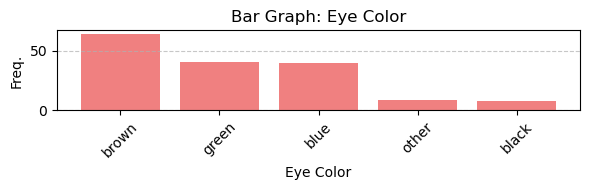

In [24]:
# Eye color bar graph:

plt.figure(figsize=(6, 2))
plt.bar(eye_color_counts.index, eye_color_counts.values, color='lightcoral')
plt.title('Bar Graph: Eye Color')
plt.xlabel('Eye Color')
plt.ylabel('Freq.')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()